## Copyrights
1. textbook official repository: https://github.com/WegraLee/deep-learning-from-scratch
    * 아래 python code들은 [chapter 3](https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch03)에서 가져왔습니다.
1. fork source: https://github.com/ExcelsiorCJH/DLFromScratch [(chapter3)](https://nbviewer.org/github/ExcelsiorCJH/DLFromScratch/blob/master/Chap03-NeuralNetwork/Chap03-NeuralNetwork.ipynb)
1. additional repository: https://github.com/SDRLurker/deep-learning [(3장)](https://nbviewer.org/github/SDRLurker/deep-learning/blob/master/3%EC%9E%A5.ipynb)
1. [plot_mnist_filters.ipynb](plot_mnist_filters.ipynb)는 
[Scikit-learn MNIST 예제](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)의 
내용으로 작성되었습니다.

### Customized by Gil-Jin Jang

## 파일 설명

| 파일명 | 파일 용도 | 관련 절 | 페이지 |
|:--   |:--      |:--    |:--      |
| [Chap03-NeuralNetwork.ipynb](Chap03-NeuralNetwork.ipynb) | 내용 + 실행가능 코드 | 3.1-3.7 | 
| [plot_mnist_filters.ipynb](plot_mnist_filters.ipynb) | MNIST Neural Network 학습 및 필터 시각화 예제 | APPENDIX | 
| [mnist_show.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/mnist_show.py) | MNIST 데이터셋을 읽어와 훈련 데이터 중 0번째 이미지를 화면에 출력합니다. | 3.6.1 손글씨 데이터셋 | 99 |
| [neuralnet_mnist.py](neuralnet_mnist.py) | 신경망으로 손글씨 숫자 그림을 추론합니다. 입력층, 은닉층1, 은닉층2, 출력층의 뉴런 수는 각각 784, 50, 100, 10입니다. | 3.6.2 신경망의 추론 처리 | 100 |
| [neuralnet_mnist_batch.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/mnist_show.py) | neuralnet_mnist.py에 배치 처리 기능을 더했습니다. | 3.6.3 배치 처리 | 104 |
| [relu.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/relu.py) | ReLU 함수를 구현한 코드입니다. | 3.2.7 ReLU 함수 | 76 |
| [sample_weight.pkl](sample_weight.pkl) | 미리 학습해둔 가종치 매개변수의 값들입니다. | 3.6.2 신경망의 추론 처리 | 100 |
| [sig_step_compare.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sig_step_compare.py) | 시그모이드 함수와 계단 함수의 그래프 모양을 비교해봅니다. | 3.2.5 시그모이드 함수와 계단 함수 비교 | 74 |
| [sigmoid.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sigmoid.py) | 시그모이드 함수를 구현한 코드입니다. | 3.2.4 시그모이드 함수 구현하기 | 72 |
| [step_function.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/step_function.py) | 계단 함수를 구현한 코드입니다. | 3.2.3 계단 함수의 그래프 | 70 |

# Chap03 - 신경망


## 목차
```
3.1 퍼셉트론에서 신경망으로 
__3.1.1 신경망의 예 
__3.1.2 퍼셉트론 복습 
__3.1.3 활성화 함수의 등장 
3.2 활성화 함수 
__3.2.1 시그모이드 함수 
__3.2.2 계단 함수 구현하기 
__3.2.3 계단 함수의 그래프 
__3.2.4 시그모이드 함수 구현하기 
__3.2.5 시그모이드 함수와 계단 함수 비교 
__3.2.6 비선형 함수 
__3.2.7 ReLU 함수 
3.3 다차원 배열의 계산 
__3.3.1 다차원 배열 
__3.3.2 행렬의 내적 
__3.3.3 신경망의 내적 
3.4 3층 신경망 구현하기 
__3.4.1 표기법 설명 
__3.4.2 각 층의 신호 전달 구현하기 
__3.4.3 구현 정리 
3.5 출력층 설계하기 
__3.5.1 항등 함수와 소프트맥스 함수 구현하기 
__3.5.2 소프트맥스 함수 구현 시 주의점 
__3.5.3 소프트맥스 함수의 특징 
__3.5.4 출력층의 뉴런 수 정하기
3.6 손글씨 숫자 인식 
__3.6.1 MNIST 데이터셋 
__3.6.2 신경망의 추론 처리 
__3.6.3 배치 처리 
```

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

신경망을 그림으로 나타내면 아래와 같다. 입력층, 은닉층, 출력층은 차례로 0층, 1층, 2층이라 하고 아래의 그림은 **2층 신경망**이다. 그 이유는 가중치($w$, weight)를 갖는 층은 2개뿐이기 때문이다.

<!-- <img src="./images/3-01.png" width="50%" height="50%"/> -->
<img src="./images/neurons.png" width="80%" height="80%"/>

출처: http://happycontrol.tistory.com/entry/인공신경망1

### 3.1.2 퍼셉트론 복습

신경망의 신호 전달 방법을 알아보기 전에 [2장](https://github.com/ExcelsiorCJH/DLFromScratch/blob/master/Chap02-Perceptron/Chap02-Perceptron.ipynb)에서 배웠던 퍼셉트론을 복습해보자. 

<img src="./images/3-03.png" width="30%" height="30%"/>

$$
y=\begin{cases} 0\quad (b + w_1x_1 +w_2x_2 \le 0) \\ 1 \quad (b + w_1x_1 + w_2x_2 > 0) \end{cases}
$$

여기서 $b$는 **편향(bias)** 을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다. $w_1$과 $w_2$는 각 신호의 **가중치(weight)** 를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

위의 식을 다음과 같이 더 간결한 형태로 나타내보자.

$$
y = h(b+ w_1 x_1 + w_2 x_2)
$$
$$
y = h(x)=\begin{cases} 0\quad (x \le 0) \\ 1 \quad (x > 0) \end{cases}
$$

위의 식에서 입력의 총합($b+ w_1 x_1 + w_2 x_2$)이 $h(x)$라는 함수를 거쳐 변환된 뒤, 그 출력값이 $y$가 된다.

### 3.1.3 활성화 함수의 등장

위에서 $h(x)$라는 함수처럼, 입력 신호의 총합을 출력 신호로 변환하는 함수를 **활성화 함수(activation function)** 이라고 한다. 이름에서도 알 수 있듯이 활성화 함수는 입력 신호의 총합이 **활성화를 일으키는지를 정하는 역할**을 한다. 위의 식을 다시 써보고 이를 그림으로 나타내 보자.

$$
a = b + w_1 x_1 + w_2 x_2
$$
$$
y = h(a)
$$

<img src="./images/3-04.png" width="30%" height="30%"/>

## 3.2 활성화 함수

활성화 함수는 임계값(0)을 경계로 출력이 변하는데, 이런 함수를 **계단함수(step function)** 라 한다. 따라서, "퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다"라고 할 수 있다. 

<!-- 그렇다면, 계단함수 말고 다른 함수를 사용하면 어떻게 될까? 이것이 바로 신경망으로 나아가는 핵심이 된다. -->

### 3.2.2 계단 함수 구현하기
계단 함수: 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

In [1]:
def step_function_scalar(x):
    if x > 0: return 1
    else: return 0

위의 `step_functon_scalar()`의 인수 `x`는 하나의 실수만 받아들일 수 없고 
리스트/튜플/넘파이 배열 등 sequence 형식은 한번에 처리할 수 없다.

In [2]:
x = [-1.0, 1.0, 2.0]

# y = step_function_scalar(x)
# TypeError: '>' not supported between instances of 'list' and 'int'

# use list comprehension for sequence types
y = [step_function_scalar(a) for a in x]
print(y, type(y))

# use list comprehension for numpy array
# output should be converted to numpy array as well 
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = np.array([step_function_scalar(a) for a in x])
print(y, type(y))

[0, 1, 1] <class 'list'>
[0 1 1] <class 'numpy.ndarray'>


### 넘파이에서 효율적으로 `step_function`을 구현하여 보자.

넘파이 배열에 비교문을 적용하면 같은 크기의 `True/False` array 로 원소별 결과를 얻을 수 있다.

In [3]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
print(y.dtype, type(y))

# 다차원 배열로 가능하다.
x = np.array([[-1.0, 1.0, 2.0], [-0.9, -0.1, 0.3]])
y = x > 0
print(y)
print(y.dtype, type(y))

[False  True  True]
bool <class 'numpy.ndarray'>
[[False  True  True]
 [False False  True]]
bool <class 'numpy.ndarray'>


### `True`는 `1`, `False`는 `0`으로 변환할 수 있다.

In [4]:
x = np.array([-1.0, 1.0, 2.0])
print((x>0).astype(int))

x = np.array([[-1.0, 1.0, 2.0], [-0.9, -0.1, 0.3]])
print((x>0).astype(int))

[0 1 1]
[[0 1 1]
 [0 0 1]]


### 최종적으로 다차원 입출력 `step_function`을 다음과 같이 구현할 수 있다

넘파이의 트릭을 사용하여 구현. 넘파이 배열도 인수로 넣을 수 있음.

> In textbook, type 'np.int' is used, but deprecated. Use plain type 'int' instead

In [5]:
# 입력: numpy 배열, 출력: numpy 배열, 0/1 int 형식
def step_function_numpy(x): return (x>0).astype(int)

In [6]:
print(step_function_numpy(np.array([-1.0, 1.0, 2.0])))
print(step_function_numpy(np.array([[-1.0, 1.0, 2.0], [-0.9, -0.1, 0.3]])))
# print(step_function_numpy([-1.0, 1.0, 2.0]))
# TypeError: '>' not supported between instances of 'list' and 'int'

[0 1 1]
[[0 1 1]
 [0 0 1]]


### 정리
- 넘파이 배열에서 부등호 연산을 수행하면 원소 각각에 부등호 연산을 수행한 `bool` 배열이 생성
- 배열 `x`의 원소 각각이 `0`보다 크면 `True`, `0` 이하면 `False`로 변환한 새로운 배열 `y`가 생성
- `numpy.astype()` 메서드: 넘파이 배열의 자료형을 변환
- 파이썬에서는 `bool`을 `int`로 변환하면 `True`는 `1`로, `False`는 `0`으로 변환

### 3.2.3 계단 함수의 그래프
계단 함수: 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

In [7]:
import numpy as np
import matplotlib.pylab as plt

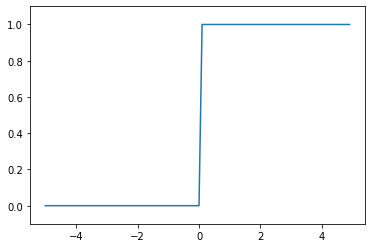

In [8]:
# alternate implementation of step_function
def step_function(x): return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.1, 3.2.4 시그모이드 함수 구현하기

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 2장에서 알아본 퍼셉트론과 신경망과의 주된 차이는 활성화 함수라고 할 수 있다.

신경망에서 자주 사용되는 활성화 함수 중 하나는 **시그모이드 함수(sigmoid function)**다. 시그모이드(sigmoid)란 'S자 모양'이라는 뜻으로 그래프의 모양을 따서 지은 것이라 한다.

$$ h(x) = \frac{1}{1 + \text{exp}(-x)} $$

<img src="./images/3-07.png" width="50%" height="50%"/>

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 2장에서 알아본 퍼셉트론과 신경망과의 주된 차이는 활성화 함수라고 할 수 있다.

### 넘파이에서 효율적으로 `sigmoid_function`을 구현하여 보자.

- np.exp(-x)는 수식 $e^{-x}$에 해당. 인수 $x$가 넘파이 배열이어도 올바른 결과가 나옴
- __브로드캐스트__: 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행

In [9]:
def print_vts(x):   # value, dtype, shape 을 출력
    print(x, x.dtype, x.shape) 

t = np.array([1.0, 2.0, 3.0])

# 넘파이 배열에 1을 더하면 각각의 원소에 더해짐
print_vts(1.0 + t)

# 각각의 원소로 1이 나뉘어짐
print_vts(1.0 / t)

# np.exp(-t)는 각각의 원소에 e^-x 가 적용되고 numpy 배열이 반환됨
print_vts(np.exp(-t))

# np.exp(-x)가 넘파이 배열을 반환하기 때문에 1 / 1 + np.exp(-x))도 
# 같은 크기의 넘파이 배열
print_vts(1/(1+np.exp(-t)))

[2. 3. 4.] float64 (3,)
[1.         0.5        0.33333333] float64 (3,)
[0.36787944 0.13533528 0.04978707] float64 (3,)
[0.73105858 0.88079708 0.95257413] float64 (3,)


In [10]:
# 최종 구현된 sigmoid 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

Draw sigmoid function:

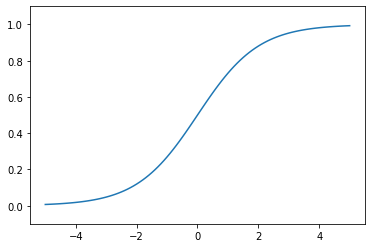

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#x = np.arange(-5.0, 5.0, 0.1)
x = np.linspace(-5.0, 5.0, 101)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

계단함수와 시그모이드 함수를 각각 살펴보았다. 이제 두 함수의 차이가 무엇인지 알아보자. 

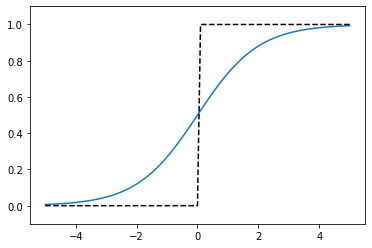

In [12]:
x = np.linspace(-5.0, 5.0, 101)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

위의 그래프에서 볼 수 있듯이, 계단함수와 시그모이드 함수의 차이는 **'연속성'** 이다. 시그모이드 함수는 곡선이며 입력에 따라 출력이 연속적으로 변하지만, 계단함수는 0을 기준으로 출력이 불연속적으로 변한다. 이러한 시그모이드 함수의 연속성이 신경망 학습에서 중요한 역할을 하게된다.

그리고 계단함수는 0과 1 중 하나의 값만 반환하는 반면, 시그모이드 함수는 0과 1사이의 실수(0.723..., 0.232... 등)를 반환한다. 즉, 퍼셉트론에서는 뉴런(노드)사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다. 계단함수와 시그모이드 함수 둘 다 입력이 중요하면 큰 값(1에 가까운)을 출력하고 입력이 중요하지 않으면 작은값(0에 가까운)을 출력하며, 입력이 아무리 크거나 작아도 시그모이드 함수의 출력은 항상 0에서 1사이이다.

### 3.2.6 비선형 함수 


> **신경망에서는 활성화 함수로 비선형 함수를 사용해야한다.** 

시그모이드 함수는 **비선형 함수(non-linear function)**이다. 

> **활성화 함수로 선형함수를 사용하지 않는 이유는?**


선형함수를 이용하면 신경망의 층을 깊게 하는 의미가 없기 때문이다. 예를 들어 활성화 함수로 $h(x) = cx$를 사용하여 3층 신경망을 구성한다고 하면 $y(x) = h(h(h(x)))$이 되며 이것은 $y(x) = c \times c \times c \times x = c^3 x$ 같다. 즉, 활성화 함수를 $h(x) = c^3 x$로 한번만 사용하여 나타낼 수 있기 때문에 여러 층으로 구성된 신경망을 하나의 층으로 쉽게 나타낼 수 있다.

In [13]:
def h1(x): return 10*x

def h3(x): return h1(h1(h1(x)))

def ha(x): return (10**3)*x

x = 7
print('h1(x) = ', h1(x))
print('h1(h1(h1(x))) = ', h1(h1(h1(x))))
print('h3(x) = ', h3(x))
print('ha(x) = ', ha(x))

h1(x) =  70
h1(h1(h1(x))) =  7000
h3(x) =  7000
ha(x) =  7000


### 3.2.7 ReLU 함수

Step과 sigmoid, 그리고 선형 활성화 함수들은 단점이 있다.

1. step function은 불연속 함수이기 때문에 양방향 미분이 존재하지 않는다.
2. sigmoid function은 연속함수이지만 gradient vanishing 이 일어나기 쉽다. 
3. linear function 은 gradient vanishing 이 없지만 층을 여러 개 쌓는 효과가 없다. 

이 세가지 단점을 해결하기 위하여 다음의 **ReLU (Rectified Linear Unit)** 활성화 함수를 사용한다.

ReLU는 입력이 0을 넘으면 입력 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다. 

$$
h(x)=\begin{cases} x \quad (x > 0) \\ 0 \quad (x \le 0) \end{cases}
$$

<img src="./images/3-09.png" width="50%" height="50%"/>

> **ReLU 의 특징**

1. 연속함수이며 미분가능하다. 단, 오른쪽 미분과 왼쪽 미분이 다르다.
2. 미분은 step function. 즉, 오류가 있거나 필요할 때는 학습하고, 정답이 맞으면 학습을 하지 않는 것을 가능하게 한다.
3. 0보다 큰 출력에 대해서는 gradient vashnishing 이 없다. 따라서 층을 깊게 쌓는 것이 가능하다. 

In [14]:
def relu(x):
    return np.maximum(0, x)

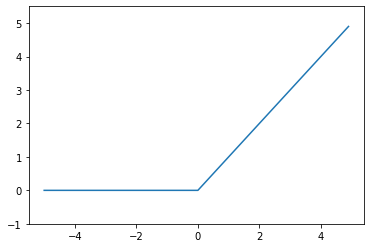

In [15]:
# drawing ReLU function
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)  # y축의 범위 지정
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

여기서는`numpy`를 이용한 다차원 배열에 대해 알아보자.

In [16]:
import numpy as np

In [17]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print('np.ndim(A) :', np.ndim(A))
print('A.shape :', A.shape)
print('A.shape[0] :', A.shape[0])

[1 2 3 4]
np.ndim(A) : 1
A.shape : (4,)
A.shape[0] : 4


In [18]:
# 2차원 배열
B = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

print(B)
print('np.ndim(B) :', np.ndim(B))
print('B.shape :', B.shape)
print('B.shape[0] :', B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
np.ndim(B) : 2
B.shape : (3, 2)
B.shape[0] : 3


### 3.3.2 행렬의 내적(행렬 곱)

<img src="./images/3-11.png" width="70%"/>
**그림 3-11** 행렬의 곱 계산 방법

<img src="./images/3-12.png" width="60%"/>
**그림 3-12** 행렬의 곱에서는 대응하는 차원의 원소 수를 일치시킨다.

<img src="./images/3-13.png" width="70%"/>
**그림 3-13** $\mathbf{A}$가 2차원 행렬, $\mathbf{B}$가 1차원 배열일 때도 대응하는 차원의 원소 수를 일치시킨다. 

In [19]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]]) 

print('A.shape :', A.shape)
print('B.shape :', B.shape)
print('np.dot(A,B) :\n', np.dot(A, B))

A.shape : (2, 2)
B.shape : (2, 2)
np.dot(A,B) :
 [[19 22]
 [43 50]]


### 3.3.3 신경망의 내적

아래의 그림처럼 간단한 신경망 예제를 통해 신경망 내적을 계산 해보자.

<img src="./images/3-14.png" width="100%"/>
**그림 3-14** 행렬의 곱으로 신경망의 계산을 수행한다. 

In [20]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], 
              [2, 4, 6]])

Y = np.dot(X, W)

print('X.shape :', X.shape)
print('W.shape :', W.shape)
print('Y:', Y)

X.shape : (2,)
W.shape : (2, 3)
Y: [ 5 11 17]


## 3.4 3층 신경망 구현하기

이번에는 아래 그림 처럼 3층 신경망을 구현해 보도록 하자.

<img src="./images/3-15.png" width="80%" height="80%"/>
**그림 3-15** 3층 신경망: 입력층(layer 0)은 2개, 첫 번째 은닉층(layer 1)은 3개, 두 번째 은닉층(layer 2)은 2개, 출력층(layer 3)은 2개의 뉴런으로 구성된다.

### 3.4.1 표기법 설명

<img src="./images/3-16.png" width="65%" height="65%"/>

### 3.4.2 각 층의 신호 전달 구현하기


<img src="./images/3-17.png" width="80%" height="80%"/>
**그림 3-17** 입력층에서 1층으로 신호전달



위의 그림에서 $a_{1}^{(1)}$에 대해 가중치 및 편향의 합으로 나타내면 다음과 같다. 

$$
a_{1}^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_{1}^{(1)}
$$

마찬가지로 $a_{2}^{(1)}$, $a_{3}^{(1)}$에 대해 이를 행렬의 내적을 이용하여 나타내면 아래와 같이 간소화 할 수 있다.

$$
\mathbf{A}^{(1)} = \mathbf{XW}^{(1)} + \mathbf{B}^{(1)}
$$

이때 행렬 $\mathbf{A}^{(1)}$, $\mathbf{X}$, $\mathbf{B}^{(1)}$, $\mathbf{W}^{(1)}$은 다음과 같다.

$$
\mathbf{A}^{(1)} = \begin{bmatrix} { a }_{ 1 }^{ (1) } & { a }_{ 2 }^{ (1) } & { a }_{ 3 }^{ (1) } \end{bmatrix}, \quad \mathbf{X} = \begin{bmatrix} { x }_{ 1 } & x_{ 2 } \end{bmatrix}, \quad \mathbf{B}^{(1)} = \begin{bmatrix} { b }_{ 1 }^{ (1) } & { b }_{ 2 }^{ (1) } & { b }_{ 3 }^{ (1) } \end{bmatrix}
$$

$$
\mathbf{W}^{(1)} = \begin{bmatrix} { w }_{ 11 }^{ (1) } & { w }_{ 21 }^{ (1) } & { w }_{ 31 }^{ (1) } \\ { w }_{ 12 }^{ (1) } & { w }_{ 22 }^{ (1) } & { w }_{ 32 }^{ (1) } \end{bmatrix}
$$

In [21]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], 
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print('W1.shape :', W1.shape)
print('X.shape :', X.shape)
print('B1.shape :', B1.shape)

A1 = np.dot(X, W1) + B1
print('A1.shape :', A1.shape)
print('A1 :', A1)

W1.shape : (2, 3)
X.shape : (2,)
B1.shape : (3,)
A1.shape : (3,)
A1 : [0.3 0.7 1.1]


<img src="./images/3-18.png" width="80%" height="80%"/>
**그림 3-18** 입력층에서 1층으로 신호전달 후 활성화 함수 적용

> Notation: 일반적으로 입력은 $\mathbf{x}$, 출력은 $\mathbf{y}$, 은닉층은 latent variable 에 많이 사용되는 $\mathbf{z}$를 사용한다. 활성화 함수를 통과하지 전의 출력은 $\mathbf{a}$, 혹은 $net$ 이 널리 많이 사용한다.

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)

print('A1 :', A1)
print('Z1 :', Z1)

A1 : [0.3 0.7 1.1]
Z1 : [0.57444252 0.66818777 0.75026011]


<img src="./images/3-19.png" width="80%" height="80%"/>
**그림 3-19** 1층에서 2층으로 신호 전달

In [23]:
W2 = np.array([[0.1, 0.4], 
               [0.2, 0.5], 
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print('Z1.shape :', Z1.shape)
print('W2.shape :', W2.shape)
print('B2.shape :', B2.shape)

A2 = np.dot(Z1, W2) + B2  # 신호 합
Z2 = sigmoid(A2)  # 활성화함수 값

print('A2 :', A2)
print('Z2 :', Z2)

Z1.shape : (3,)
W2.shape : (3, 2)
B2.shape : (2,)
A2 : [0.51615984 1.21402696]
Z2 : [0.62624937 0.7710107 ]


<img src="./images/3-20.png" width="80%" height="80%"/>
**그림 3-20** 2층에서 출력층으로의 신호 전달

**항등 함수(identity function)**: 
최종단계는 네트워크의 출력을 _그대로 전달한다_. 따라서, 마지막 활성화 함수 $\sigma(x) = x$ 인 __항등함수__이다. 

<img src="./images/3-21.png" width="30%"/>
**그림 3-21** 항등 함수 

In [24]:
def identity_function(x): return x

> Notation: 많은 논문이나 교과서에 $\sigma$를 sigmoid 함수로 더 많이 쓰인다. 
위의 그림은 수정을 하기 어렵고, 책도 그렇게 되어 있기 때문에 그냥 두었다. 

In [25]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # Y = A3

print('W3.shape :', W3.shape)
print('B3.shape :', B3.shape)
print('A3.shape :', A3.shape)
print('Y.shape :', Y.shape)

print('A3 :', A3)
print('Y :', Y)

W3.shape : (2, 2)
B3.shape : (2,)
A3.shape : (2,)
Y.shape : (2,)
A3 : [0.31682708 0.69627909]
Y : [0.31682708 0.69627909]


### 3.4.3 구현 정리

위에서 구현한 것을 정리해 보도록 하자

In [26]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], 
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], 
                              [0.2, 0.5], 
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], 
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network  # dictionary return


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류(classification)와 회귀(regression) 둘 다 사용할 수 있다. 대신, 분류인지 회귀인지에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 **항등 함수**를 사용하며, 분류에는 **소프트맥스 함수**를 사용한다.

### 3.5.1 소프트맥스 함수 구현하기

<!-- **항등 함수**(identity function)는 입력을 그대로 출력한다. -->

분류에 사용하는 **소프트맥스 함수**(softmax function)의 식은 다음과 같다.

$$
y_k = \frac{\exp(a_k)}{\sum_{i = 1}^{n}{\exp(a_i)}}
$$
$\exp(x)$는 $e^x$, 지수함수(exponential function)이다. 
$n$은 출력측의 뉴런 수, $y_k$는 그 중 $k$번째 출력임을 뜻한다. 소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다. 

<img src="./images/3-22.png" width="30%"/>
**그림 3-22** 소프트맥스 함수 

출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문에 소프트맥스 함수는 모든 입력 신호로부터 화살표를 받는다. 

In [27]:
# softmax function implementation example
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)   # e^a_k
print(exp_a)
# [ 1.34985881 18.17414537 54.59815003]

sum_exp_a = np.sum(exp_a)   # sum e^a_k
print(sum_exp_a)
# 74.1221542101633

y = exp_a/sum_exp_a  # softmax output
print(y)
# [0.01821127 0.24519181 0.73659691]

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [28]:
def softmax_0(a):
    exp_a = np.exp(a)   # e^a_k
    sum_exp_a = np.sum(exp_a)   # sum e^a_k
    y = exp_a/sum_exp_a  # softmax output
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

softmax 함수는 exp 함수를 사용하기 때문에 구현할 때에는 overflow 를 조심해야 한다. 
예를 들어 $e^{1000}$은 double type으로는 무한대($\infty$, inf)가 된다. 
따라서 이런 큰 값끼리 나눗셈을 하면 수치가 **불안정**해진다.

In [29]:
X = [10, 100, 200, 400, 600,1000]
for x in X: print('e^{0:d}, e^-{0:d} = {1:.6e}, {2:.6e}, '.format(x,np.exp(x),np.exp(-x)))

e^10, e^-10 = 2.202647e+04, 4.539993e-05, 
e^100, e^-100 = 2.688117e+43, 3.720076e-44, 
e^200, e^-200 = 7.225974e+86, 1.383897e-87, 
e^400, e^-400 = 5.221470e+173, 1.915170e-174, 
e^600, e^-600 = 3.773020e+260, 2.650397e-261, 
e^1000, e^-1000 = inf, 0.000000e+00, 


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


> **overflow, underflow, precision, and range of floating-point numbers**: 컴퓨터는 실수를 4바이트(dtype float) 혹은 8바이트(dtype double)와 같이 크기가 유한한 데이터로 저장한다. 따라서 표현할 수 있는 수의 범위(range)가 한정되어 너무 큰 값은 표현할 수 없다는 문제(overflow)가 발생한다. 또한 표현할 수 있는 가장 작은 값의 크기(precision)보가 작은 값이 주어지면 0이 된다(underflow).

- Softmax 함수의 개선
    - 분모/분자에 같은 상수를 곱해도 softmax 함수의 값은 같다. 

$$
y_k = \frac{\exp(a_k)}{\sum_{i = 1}^{n}{\exp(a_i)}} = \frac{C \exp(a_k)}{\sum_{i = 1}^{n}{C \exp(a_i)}} = \frac{\exp(a_k + \log C)}{\sum_{i = 1}^{n}{\exp(a_i + \log C)}}
$$

범위를 안정적으로 유지하기 위해서 $\exp(x)$에서 $x \leq 0$이 만족시키도록 $\log C$ 값을 정한다(우리가 관심있는 것은 "최대값"인 class label을 찾는 것이므로 underflow는 이 경우 크게 문제되지 않는다). 이를 위하여 예측값 중 최대값을 차감한다. 

$$\log C \Leftarrow -\max_{j} a_j$$
$$
y_k = \frac{\exp(a_k - \max_{j} a_j)}{\sum_{i = 1}^{n}{\exp(a_i - \max_{j} a_j)}}
$$

In [30]:
a = np.array([1010, 1000, 990])
print(np.exp(a)/np.sum(np.exp(a)))

c = np.max(a)
print(a-c)
print(np.exp(a-c)/np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [31]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    return exp_a / sum(exp_a)

print(softmax(np.array([1010, 1000, 990])))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


### 3.5.3 소프트맥스 함수의 특징

In [32]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print('y :', y)
print('np.sum(y) :', np.sum(y))

y : [0.01821127 0.24519181 0.73659691]
np.sum(y) : 1.0


위의 출력결과 에서 볼 수 있듯이 소프트맥스 함수 출력의 총합은 1이다. 이러한 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

 MNIST는 미국 인구조사국의 직원들이 쓴 숫자와 고등학생들이 쓴 숫자로 만든 미국 국립표준기술연구소(NIST)의 데이터베이스를 다시 섞어 만든 필기체 숫자 이미지 데이터베이스이다. 

MNIST 데이터는 딥러닝 예제에서 빠지지 않고 등장하는 데이터라고 할 수 있다.

![](./images/mnist.png)

MNIST 데이터셋은 0부터 9까지 숫자 이미지로 구성됩니다. 훈련 60,000장(인구 센서스 기입), 시험 10,000장(미국 고등학생)이 주어진다. 
`dataset/mnist.py` 파일에 정의된 `load_mnist()` 함수를 이용하면 쉽게 가지고 올 수 있다.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

**sys.path.append(os.pardir)**

> mnist.py 파일은 이 책 예제 소스의 `dataset` 디렉토리에 있고, **`from dataset.mnist`** 가 `load_mnist` 함수를 읽어들이기 위해서는 검색 경로에서 `dataset` 폴더를 찾을 수 있어야 한다. 각 예제는 `ch01, ch02, ..., ch08 (or Chap01-...)` 폴더에서 수행한다고 가정하면 검색 경로가 부모 디렉토리가 포함되어야 한다.

In [34]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False, one_hot_label=False)
print('x_train.shape :', x_train.shape)
print('t_train.shape :', t_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', t_test.shape)
print('t_train[0] =',t_train[0])
print(x_train[0][0][::2,::2])

x_train.shape : (60000, 1, 28, 28)
t_train.shape : (60000,)
x_test.shape : (10000, 1, 28, 28)
t_test.shape : (10000,)
t_train[0] = 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  30  94 170 253 253 225 253 195   0   0]
 [  0   0   0   0 219 253 253 198 247   0   0   0   0   0]
 [  0   0   0   0   0   1 253   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 190  70   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 240 253  25   0   0   0   0]
 [  0   0   0   0   0   0   0   0  93 253   0   0   0   0]
 [  0   0   0   0   0   0   0  46 183 253   2   0   0   0]
 [  0   0   0   0   0  24 221 253 253  78   0   0   0   0]
 [  0   0   0  18 219 253 253  80   0   0   0   0   0   0]
 [  0   0 136 253 212 132   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [35]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=True, one_hot_label=True)
# normalize == True: 0..255 -> 0..1
# one_hot_label == True: 0 -> [1 0 0 ...], 1 -> [0 1 0 ...], 2 -> [0 0 1 ...]
print('x_train.shape :', x_train.shape)
print('t_train.shape :', t_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', t_test.shape)
print('t_train[0] =',t_train[0])
with np.printoptions(precision=2, suppress=True):
    print(x_train[0][0][::2,::2])

x_train.shape : (60000, 1, 28, 28)
t_train.shape : (60000, 10)
x_test.shape : (10000, 1, 28, 28)
t_test.shape : (10000, 10)
t_train[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.12 0.37 0.67 0.99 0.99 0.88 0.99 0.76 0.   0.  ]
 [0.   0.   0.   0.   0.86 0.99 0.99 0.78 0.97 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.75 0.27 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.94 0.99 0.1  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.36 0.99 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.18 0.72 0.99 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.09 0.87 0.99 0.99 0.31 0.   0.   0.   0.  ]
 [0.   0.   0.   0.07 0.86 0

In [36]:
# loading options for furthur processing
# flatten=True, normalize=False, one_hot_label=False
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
# flatten = True: 1x28x28 -> 784
print('x_train.shape :', x_train.shape)
print('t_train.shape :', t_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', t_test.shape)
print('t_train[0] =',t_train[0])
with np.printoptions(precision=2, suppress=True):
    print(x_train[0][::4])

x_train.shape : (60000, 784)
t_train.shape : (60000,)
x_test.shape : (10000, 784)
t_test.shape : (10000,)
t_train[0] = 5
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.49 0.65 0.
 0.   0.   0.12 0.67 0.99 0.99 0.   0.   0.   0.93 0.99 0.99 0.32 0.
 0.   0.   0.86 0.99 0.97 0.   0.   0.   0.   0.31 0.99 0.17 0.   0.
 0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.
 0.   0.   0.   0.75 0.   0.   0.   0.   0.   0.   0.14 0.42 0.   0.
 0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.99 0.   0.
 0.   0.   0.   0.   0.36 0.   0.   0.   0.   0.   0.   0.   0.25 0.
 0.   0.   0.   0.   0.72 0.01 0.   0.   0.   0.   0.15 0.99 0.   0.
 0.   0.   0.   0.87 0.99 0.   0.   0.   0.   0.09 0.99 0.32 0.   0.
 0.   0.   0.86 0.99 0.   0.   0.   0.   0.22 0.99 0.52 0.   0.   0.
 0.   0.53 0.83 0.   0.   0.   0.   0.   0.   0.   

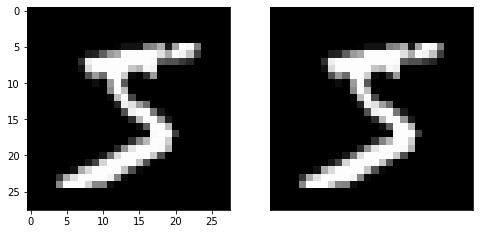

In [37]:
figsize(8,4)
img = x_train[0].reshape(28, 28)
fig1 = plt.subplot(1,2,1).imshow(img, 'gray')
plt.xticks(range(0,28,5)), plt.yticks(range(0,28,5));
plt.subplot(1,2,2).imshow(img, 'gray')
plt.xticks([]), plt.yticks([]);

### 3.6.2 신경망의 추론 처리

이 예제에서는 `sample_weight.pkl`에 사전에 '학습된 가중치 매개변수'를 이용해 MNIST 데이터를 분류한다.

![](./images/mnist_nn.png)

아래 예제코드는 [neuralnet_mnist.py](neuralnet_mnist.py)를 jupyter notebook에 그대로 옮긴 것이다.

- Definition of a neural network with 2 hidden layers (3 layers) for MNIST
- $784 \times 50 \times 100 \times 10$ nodes


In [38]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

import pickle   # 미리 학습된 모델을 읽어들이기 위해 필요 

`get_data()`에서 MNIST 데이터를 불러올 때 `normalize=True`로 해서 데이터를 불러온다. `normalize`를 `True`로 설정하면 이미지의 pixel 값의 범위인 0~255의 값을 255로 나눠, 0.0 ~ 1.0 범위로 변환 해준다. 

In [39]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    # 학습할 필요가 없으니 test data만 return 한다.
    return x_test, t_test

def init_network():
    # pickle 로 저장된 network 를 불러온다 
    with open("./sample_weight.pkl", 'rb') as f: network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    z1 = sigmoid(np.dot(x, W1) + b1)
    z2 = sigmoid(np.dot(z1, W2) + b2)
    y = softmax(np.dot(z2, W3) + b3)
    # single line
    # y = softmax(np.dot(sigmoid(np.dot(sigmoid(np.dot(x, W1)+b1),W2)+b2),W3)+b3)
    return y

학습된 가중치를 이용하여 **정확도(accuracy)**를 계산한다.

In [40]:
x, t = get_data()   # load test data
network = init_network()  # load model

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

먼저 위에서 작성한 코드는 `for`문을 돌면서, 숫자 이미지 **1 개**가 입력 되었을 때 분류를 수행하는 코드이다.
이를 그림으로 나타내면 아래와 같다.

<img src="./images/3-26.png" width="70%" height="70%">
<center>**그림 3-26** 신경망 각 층의 배열 형상</center>

데이터 및 모델 읽어 들이기

In [41]:
x, t = get_data()
network = init_network()

다차원 배열에서 차원의 원소 수 확인

In [42]:
print(x.shape)
W1, W2, W3 = network['W1'], network['W2'], network['W3']

# y = x * W1 * W2 * W3  (excluding bias vectors)
print(x[0].shape, W1.shape, W2.shape, W3.shape)

(10000, 784)
(784,) (784, 50) (50, 100) (100, 10)


Forwarding, softmax, and argmax

In [43]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

# forwarding: prediction
a3 = sigmoid(np.dot( sigmoid(np.dot( sigmoid(np.dot(x[0], W1)+b1), W2)+b2), W3)+b3)
with np.printoptions(precision=3, suppress=True): print(a3)
y = softmax(a3)
with np.printoptions(precision=3, suppress=True): print(y, 'sum(y)=', np.sum(y))
print('target =', t[0], ' prediction =', np.argmax(y))

[0.524 0.033 0.903 0.943 0.015 0.37  0.    1.    0.109 0.914]
[0.096 0.059 0.141 0.146 0.058 0.082 0.057 0.155 0.064 0.142] sum(y)= 0.9999999
target = 7  prediction = 7


### Full batch processing

여러개의 샘플을 하나의 입력 단위로 묶은 것을 **배치(batch)** 라고 하며,  
전체를 한꺼번에 처리하는 것을 **full batch processing**이라고 한다.

이미지를 하나씩 forwarding 하는 것과 전체를 한꺼번에 처리하는 것을 비교하여 보자. 
`time` package 를 이용하여 소요된 시간을 측정하여 비교한다.

In [44]:
# Using direct matrix multiplication 
import time

W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

# 10000 x ( (784,) x (784, 50) x (50, 100) x (100, 10))
start = time.time()
accuracy_cnt = 0
for i in range(0, len(x)):
    yi = softmax(sigmoid(np.dot( sigmoid(np.dot( sigmoid(np.dot(x[0], W1)+b1), W2)+b2), W3)+b3))
    accuracy_cnt += np.sum(np.argmax(yi) == t[i])
print('Accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

#  (10000, 784) x (784, 50) x (50, 100) x (100, 10)
start = time.time()
accuracy_cnt = 0
y = softmax(sigmoid(np.dot( sigmoid(np.dot( sigmoid(np.dot(x, W1)+b1), W2)+b2), W3)+b3))
p = np.argmax(y, axis=1)
accuracy_cnt = np.sum(p == t)    
print('Accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

Accuracy: 0.103,  elapsed time = 1.7012 seconds
Accuracy: 0.935,  elapsed time = 0.0439 seconds


In [45]:
# Using the internal predict method
import time

# 10000 x ( (784,) x (784, 50) x (50, 100) x (100, 10))
start = time.time()
accuracy_cnt = 0
for i in range(0, len(x)):
    yi = predict(network, x[i])
    accuracy_cnt += np.sum(np.argmax(yi) == t[i])
print('Accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

#  (10000, 784) x (784, 50) x (50, 100) x (100, 10)
start = time.time()
accuracy_cnt = 0
y = predict(network, x)
p = np.argmax(y, axis=1)
accuracy_cnt = np.sum(p == t)    
print('Accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

Accuracy: 0.935,  elapsed time = 1.4890 seconds
Accuracy: 0.935,  elapsed time = 0.0375 seconds


### Mini-batch processing 
이번에는 이미지 전체가 아닌 **100개**씩을 입력하여 출력결과 또한 **100개씩** 출력하도록 구성해보자. 아래의 그림은 100개의 이미지를 입력했을 때, 100개의 출력이 나오는 것을 나타낸 것이다. 이렇게 전체가 아닌 일부를 하나의 입력 단위로 묶은 것을 **미니배치(mini-batch)** 라고 한다.

<img src="./images/3-27.png" width="70%" height="70%"/>
<center>**그림 3-27** 미니 배치 처리를 위한 배열들의 형상</center>

In [46]:
import time

# 10000 x ( (784,) x (784, 50) x (50, 100) x (100, 10))
start = time.time()
accuracy_cnt = 0
for i in range(0, len(x)):
    yi = predict(network, x[i])
    accuracy_cnt += np.sum(np.argmax(yi) == t[i])
print('Sample-wise, accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

#  (10000, 784) x (784, 50) x (50, 100) x (100, 10)
start = time.time()
accuracy_cnt = 0
y = predict(network, x)
p = np.argmax(y, axis=1)
accuracy_cnt = np.sum(p == t)    
print('Full-batch, accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

# 100 x 100 x ( (784,) x (784, 50) x (50, 100) x (100, 10))
start = time.time()
batch_size = 100  # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print('Mini-batch, accuracy: {:.3f},  elapsed time = {:.4f} seconds'.format(accuracy_cnt/len(x), time.time()-start))

Sample-wise, accuracy: 0.935,  elapsed time = 1.7531 seconds
Full-batch, accuracy: 0.935,  elapsed time = 0.0379 seconds
Mini-batch, accuracy: 0.935,  elapsed time = 0.0636 seconds


> **NOTE** 수치 계산 라이브러리들은 대부분 큰 배열을 효율적으로 처리할 수 있도록 최적화되어 있다. 그리고 데이터 전송 회수를 줄여 버스의 부하(load)를 줄여 주는 것이 컴퓨터 자원을 효율적으로 사용할 수 있다. 하지만 한번에 처리할 수 있는 메모리의 크기의 제한이 있기 때문에(예. GPU memory size) 너무 배치의 크기가 커지면 오히려 효율이 떨어질 수 있다. 

> 따라서, 배치 크기를 적절하게 설정하여 주는 것이 중요하다. 

## 3.7 정리

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- numpy의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수로 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.